### モジュールのロード

In [1]:
import glob
import japanize_matplotlib
import os
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

# 辞書に順序がある前提で書いている可能性があるので、python3.7以上でないと正常に動作しないかもしれない
# バージョンを確認のために出力
print(sys.version)

3.8.6 (default, Oct 10 2020, 07:54:55) 
[GCC 5.4.0 20160609]


### 変数・配列の宣言

In [2]:
# 各種値を宣言
bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
classes = ["S", "W", "A", "B", "C", "D"]
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
fix_process = 4
fix_benchmark_class = "C"
path = './'
marker_size = 12
marker_fig = "v"

### 引数に処理するベンチマーク名・プロセス数・ベンチマーククラスを格納した配列をとり、それらを集計しつつグラフを生成する関数

In [3]:
def show_graph(BenchMarks=[], Processes=[], BenchMarkClasses=[], fix_process=4, fix_benchmark_class="C"):
    path = './'

    if (BenchMarks==[] or Processes==[] or BenchMarkClasses==[]):
        print("関数の引数となっている配列が空です。")
    else:
        for bench_mark in BenchMarks:
                
            # fixed_C にはベンチマーククラスCで実行プロセス数が1 ~ 256までの結果が入る
            fixed_C = list()
            # fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
            fixed_process = list()

            for bench_mark_class in BenchMarkClasses:
                for process in Processes:
            
                    file_name = ("pprof_"+bench_mark+bench_mark_class+str(process)+".csv")
                    file_path = path+file_name
                    if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
                        data_frame = pd.read_csv(path+file_name)
                        data_frame = data_frame.set_index(['Name'])
                        if (process == fix_process):
                            fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}).sort_index())
#                             fixed_process.append(data_frame.rename(columns = {'#Call': bench_mark_class}))
                        if (bench_mark_class == fix_benchmark_class):
                            fixed_C.append(data_frame.rename(columns = {'#Call': process}).sort_index())
            if (len(fixed_process) != 0):
                summary_fixed_process = pd.concat(fixed_process, axis=1)
            if(len(fixed_C) != 0):
                summary_fixed_C = pd.concat(fixed_C, axis=1)
            if(len(fixed_process) != 0):
#                 summary_fixed_process.sort_index(axis=1, inplace=True)
                summary_fixed_process_title = bench_mark+"において実行プロセス数を"+str(fix_process)+"に固定しベンチマーククラスを変化させたときの実行された全ての関数のコール回数"
                plt.figure()
                summary_fixed_process.T.plot(xlabel="実行ベンチマーククラス",ylabel="関数のコール回数",logy=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, ncol=2, prop={'size':15}, labelspacing=0.1)

            if(len(fixed_C) != 0):
                summary_fixed_C.sort_index(axis=1, inplace=True)
                summary_fixed_C_title = bench_mark+"においてベンチマーククラスをCに固定し実行プロセス数を変化させたときの実行された全ての関数のコール回数"
                plt.figure()
                summary_fixed_C.T.plot(xlabel="実行プロセス数",ylabel="関数のコール回数",logx=True, logy=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, ncol=2, prop={'size':15}, labelspacing=0.1)
                # plt.savefig(path+bench_mark+"_C.png", bbox_inches="tight")
                # plt.close('all')
            

<ipython-input-3-f94568cdff1d>:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

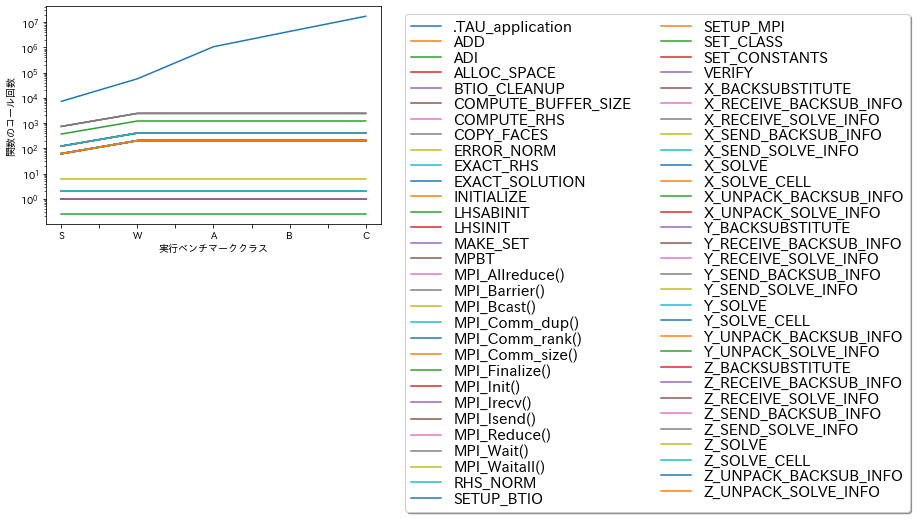

<Figure size 432x288 with 0 Axes>

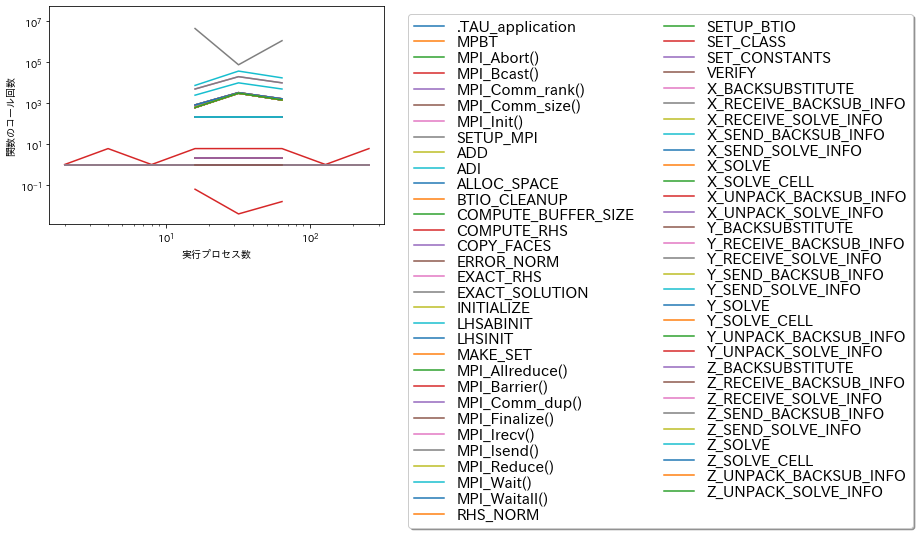

<Figure size 432x288 with 0 Axes>

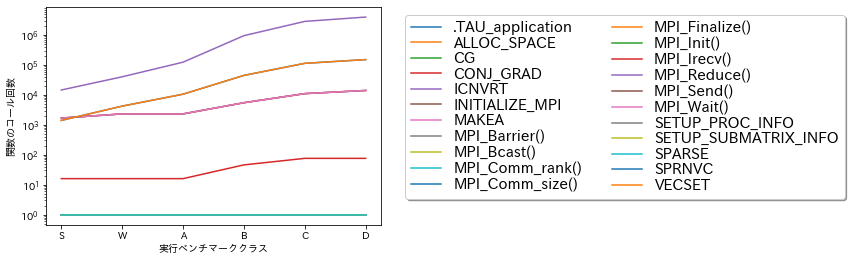

<Figure size 432x288 with 0 Axes>

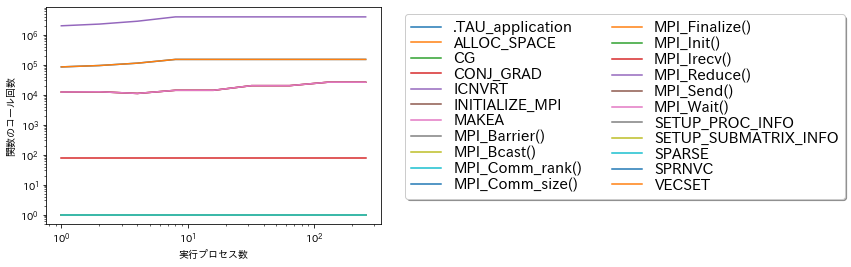

<Figure size 432x288 with 0 Axes>

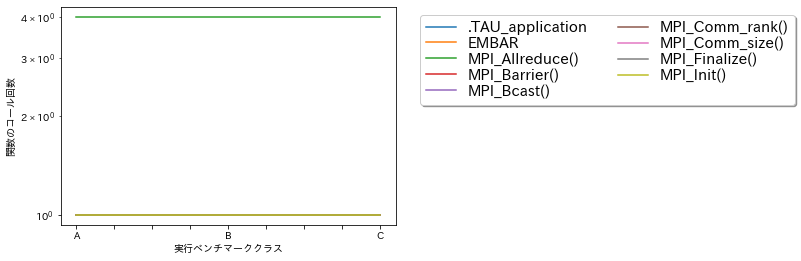

<Figure size 432x288 with 0 Axes>

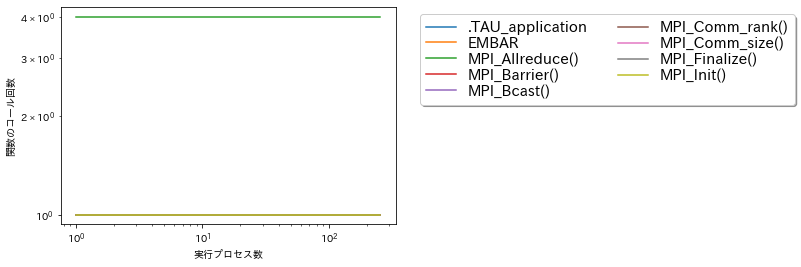

<Figure size 432x288 with 0 Axes>

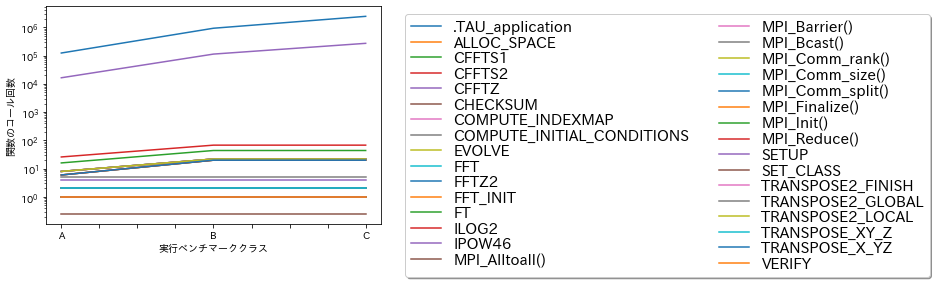

<Figure size 432x288 with 0 Axes>

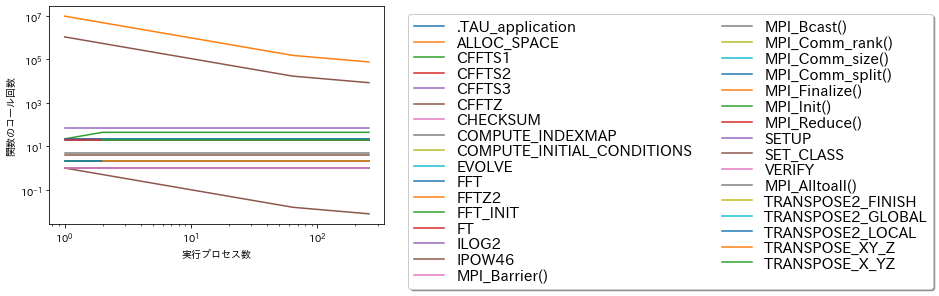

<Figure size 432x288 with 0 Axes>

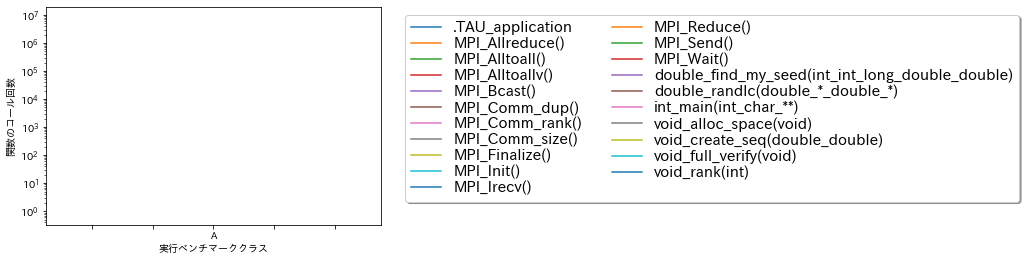

<Figure size 432x288 with 0 Axes>

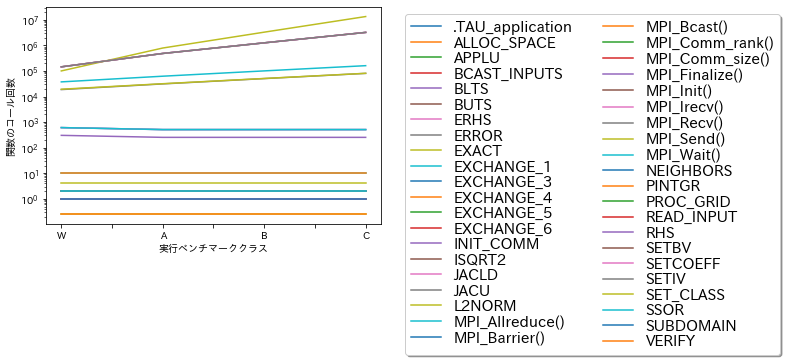

<Figure size 432x288 with 0 Axes>

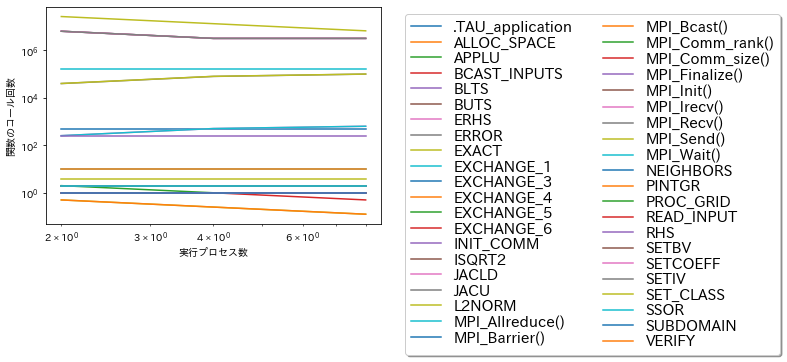

<Figure size 432x288 with 0 Axes>

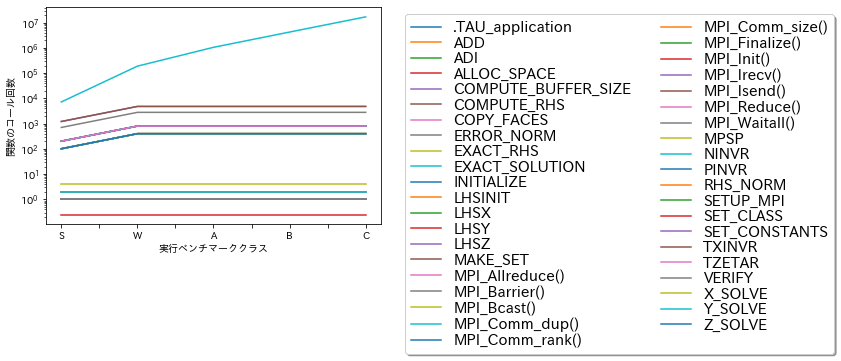

<Figure size 432x288 with 0 Axes>

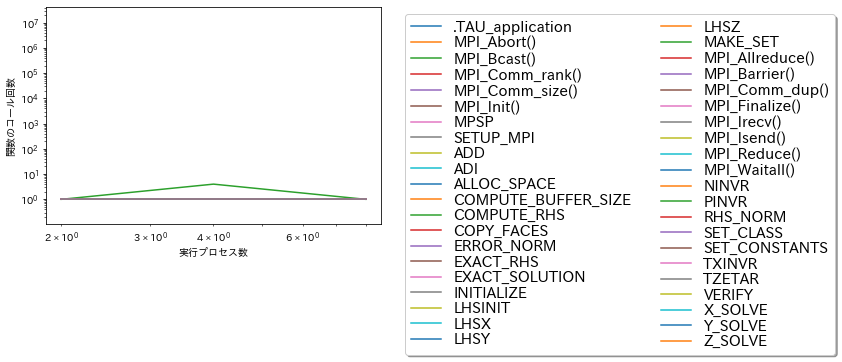

In [4]:
bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
classes = ["S", "W", "A", "B", "C", "D"]
show_graph(bench_marks, processes, classes)